In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

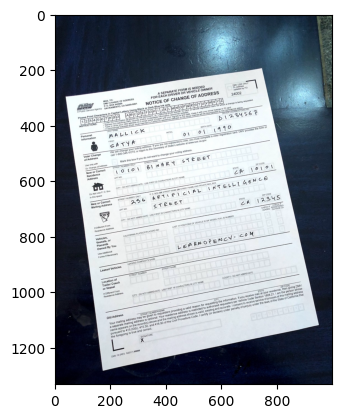

In [2]:
image=cv2.imread('scanned-form.jpg')
plt.imshow(image)

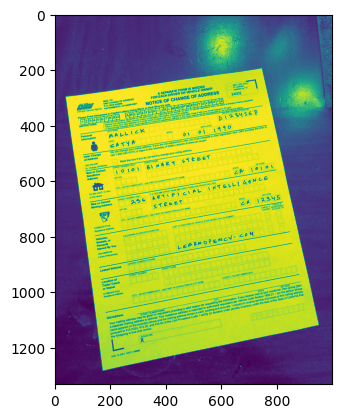

In [3]:
imageGray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.imshow(imageGray)

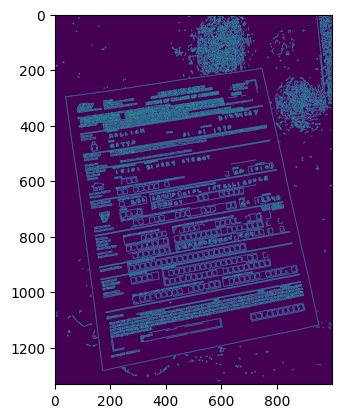

In [4]:
grayblur=cv2.GaussianBlur(imageGray,(5,5),0)
# plt.imshow(grayblur)
# thresh,imagethresh=cv2.threshold(grayblur,200,255,cv2.THRESH_BINARY_INV)
# plt.imshow(imagethresh)
canny=cv2.Canny(grayblur,30,50)
plt.imshow(canny)

In [5]:
contours, heirarchy = cv2.findContours(canny,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
contours=sorted(contours,key=cv2.contourArea,reverse=True)

[[[ 744  195]]

 [[  38  297]]

 [[ 171 1284]]

 [[ 948 1120]]]


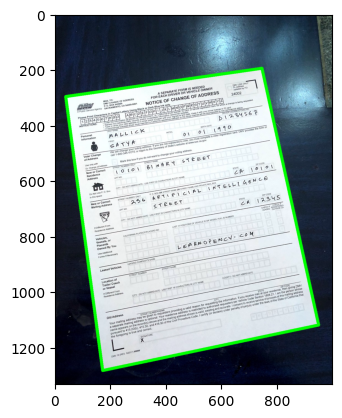

In [6]:
# print(len(contours))

for c in contours:
    epi= 0.02*cv2.arcLength(c,True)
    corners=cv2.approxPolyDP(c,epi,True)
    if len(corners)==4:
        target=corners
        break

out=image.copy()        
cv2.drawContours(out,[target],-1,[0,255,0],10)
print(corners)
plt.imshow(out)

In [7]:
target

array([[[ 744,  195]],

       [[  38,  297]],

       [[ 171, 1284]],

       [[ 948, 1120]]], dtype=int32)

In [8]:
image.shape

(1333, 1000, 3)

In [28]:
output=[[0,0],[1000,0],[1000,1333],[0,1333]]

In [29]:
M=cv2.getPerspectiveTransform(np.float32(target),np.float32(output))

In [34]:
final=cv2.warpPerspective(image,M,(output[2][0],output[2][1]),flags=cv2.INTER_LINEAR)

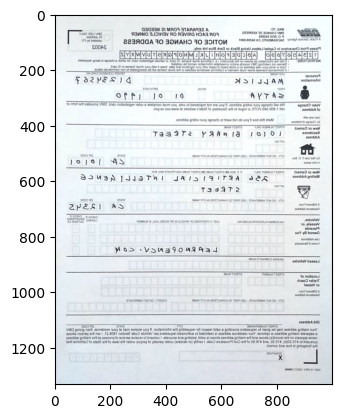

In [35]:
plt.imshow(final)